# 뉴럴네트워크 이진분류 (당뇨병 데이터셋)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

## 1.데이터 준비

In [53]:
#!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/diabetes.csv

In [54]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
# 이상치 데이터 전처리 필요합니다.

## 2.데이터 분리

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [60]:
y.value_counts()

,count
Outcome,
0,500
1,268


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## 3.데이터 전처리

In [64]:
# 결측치 확인
X_train.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


### 스케일링

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
ss = StandardScaler()

# 학습
ss.fit(X_train)

# 데이터 변경
X_train_s = ss.transform(X_train)

In [67]:
y_train = y_train.to_numpy()

## 4.모델 만들기

In [68]:
from keras import layers

In [69]:
model = keras.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=3, activation='relu'),
    # 2진분류는 sigmoid, 다중분류는 softmax
    layers.Dense(units=1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [71]:
EPOCHS = 150
BATCHSIZE = 32

history = model.fit(X_train_s,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCHSIZE,
                    validation_split=0.2
                    )

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.6085 - loss: 0.7073 - val_acc: 0.6748 - val_loss: 0.6772
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.6331 - loss: 0.7076 - val_acc: 0.6992 - val_loss: 0.6709
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.6725 - loss: 0.6983 - val_acc: 0.6992 - val_loss: 0.6675
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6838 - loss: 0.6878 - val_acc: 0.7073 - val_loss: 0.6653
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.6957 - loss: 0.6812 - val_acc: 0.7154 - val_loss: 0.6633
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7031 - loss: 0.6746 - val_acc: 0.7154 - val_loss: 0.6615
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6916 - loss: 0.6807 - val_acc: 0.7236 - val_loss: 0.6604
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7036 - loss: 0.6727 - val_acc: 0.7154 - val_loss: 0.6592
Epoch 9/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.741

In [72]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

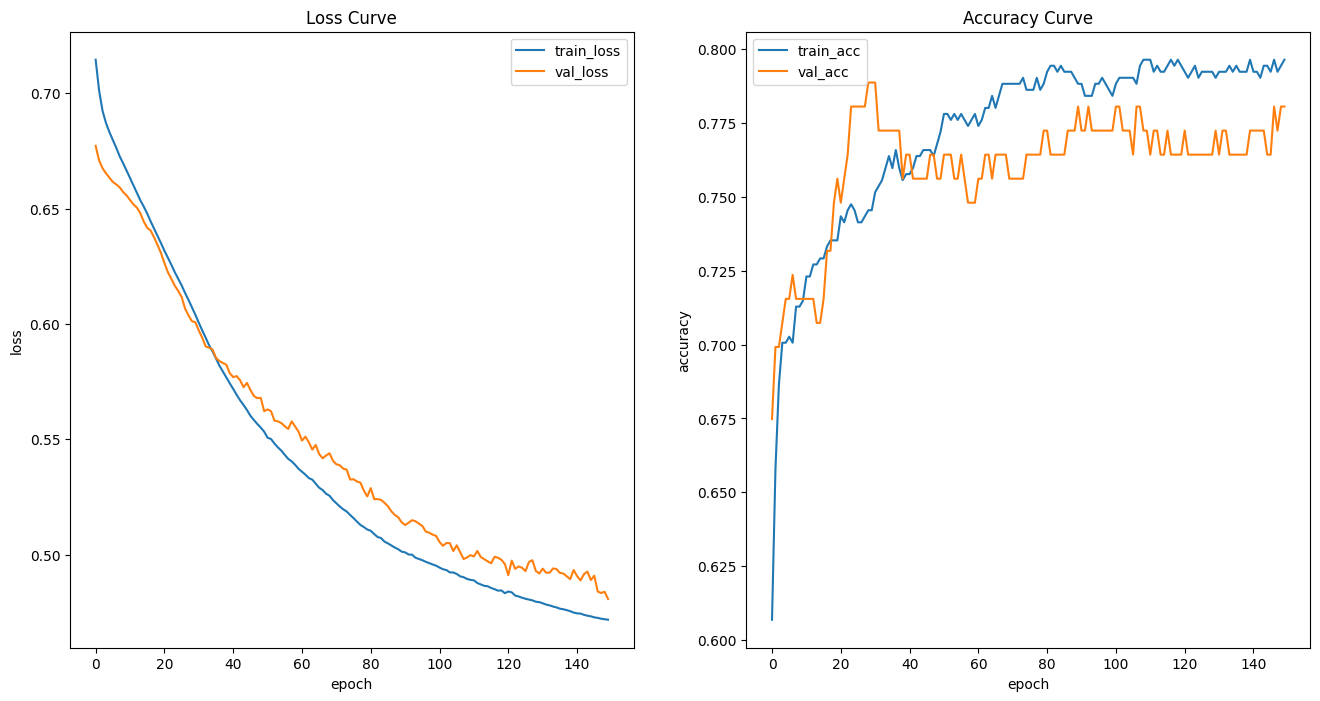

In [73]:
plot_history(history)

## 5.테스트

In [74]:
X_test_s = ss.transform(X_test)
y_test = y_test.to_numpy()

In [76]:
y_pred = model.predict(X_test_s)
y_pred[:5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.6025274 ],
       [0.4150968 ],
       [0.20071083],
       [0.21275115],
       [0.20071083]], dtype=float32)

In [77]:
y_test[:5]

array([0, 0, 0, 1, 0])

In [78]:
y_pred = (y_pred.reshape(-1) > 0.5).astype('int')
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

### 평가지표

In [79]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [80]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred)
  pre = precision_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  print('acc: ', acc)
  print('recall: ', np.around(re, 4))
  print('precision: ', np.around(pre, 4))
  print('f1: ', np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc:  0.7532467532467533
recall:  0.5741
precision:  0.6739
f1:  0.62


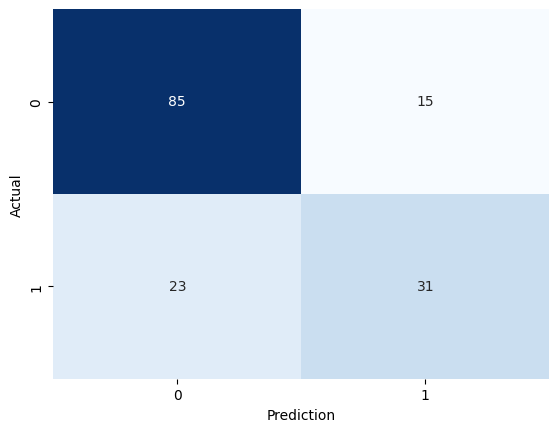

In [81]:
print_metrics(y_test, y_pred)

# END